In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mc_generator import *

# Generate a Markov process given transition probability

* **Aim**: Generate a Markov process $X_t$; it menas we want to get the value of $X_t$ at time $t=t_1, t_2, \dots, t_n$. 

* **Approach**: Firstly, generate $X_t$. By Markov property, we know the distribution of $X_{t+\Delta t}| X_t$. Then we can generate $X_{t+\Delta t}$.  

## Generate a Brownian motion

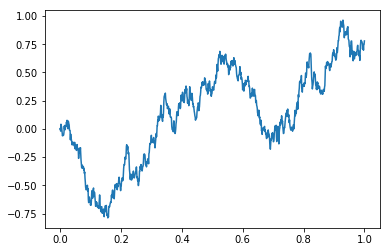

In [5]:
BM = BrownianMotion()
BM.simulate()
BM.figure()

## Generate a CIR diffusion

We want to generate $r_t$ which is defined as
$$d r_t = a(b-r_t) dt + \sigma \sqrt{r_t} dW_t.$$

And we know that 
$$r_{t+\Delta t}|r_t= \chi^2( \frac{4ab}{\sigma^2}, 2c r_t e^{-a \Delta t} )$$
where $c = \frac{2a}{(1 - e^{-a \Delta t})\sigma^2}$.

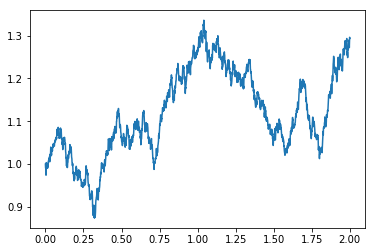

In [9]:
cir = CIR(initial_state=1)
cir.simulate(num_trails=2000, start_time=0.0, end_time=2.0)
cir.figure()

## Generate a Poisson process

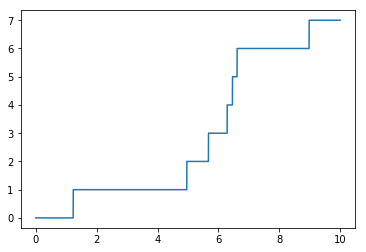

In [10]:
N = Poission()
N.simulate( num_trails=10000, start_time=0.0, end_time=10)
N.figure()

# Generate a couting process with given intensity

Let $N$ be a couting process with compensator $A$. And we assume 
$$A_t = \int^t_0 \lambda_s ds$$
where $\lambda_s$ is a CIR diffusion. 

* **Question**: How to simulate $N$?

* **Answer**: We generate a Poisson process with time change $t\mapsto A_t$.

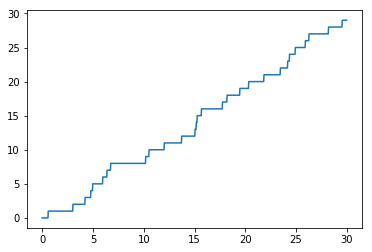

In [3]:
cir = CIR(a=1.0, b=1.2, sigma=0.2, initial_state=0)
cir.simulate(end_time = 30)
intensity = cir.get_simulation()[1]

couting = CoutingProcess(intensity)
couting.simulate(end_time=30)
couting.figure()

## Next: Estimate the rare event $P(N_T \geq n)$